# Research Other Visualizations for Clustering
## Nigerian Songs Dataset - Scatterplot Analysis

This notebook explores different visualization techniques for clustering analysis using the Nigerian songs dataset. We'll create various scatterplots to understand the relationships between different musical features and identify potential clusters in the data.

**Dataset Source**: Nigerian Songs Dataset (nigerian-songs.csv)
**Objective**: Create 5 well-documented scatterplots to explore clustering patterns in Nigerian music data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the Nigerian songs dataset
df = pd.read_csv('nigerian-songs.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())

Dataset shape: (530, 16)

Column names:
['name', 'album', 'artist', 'artist_top_genre', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature']

First few rows:
                       name                         album  \
0                    Sparky            Mandy & The Jungle   
1                shuga rush  EVERYTHING YOU HEARD IS TRUE   
2                     LITT!                         LITT!   
3  Confident / Feeling Cool               Enjoy Your Life   
4                wanted you                         rare.   

                artist artist_top_genre  release_date  length  popularity  \
0        Cruel Santino  alternative r&b          2019  144000          48   
1  Odunsi (The Engine)          afropop          2020   89488          30   
2                 AYLØ        indie r&b          2018  207758          40   
3           Lady Donli     nigerian pop          201

In [3]:
# Data preprocessing and cleaning
print("Missing values check:")
print(df.isnull().sum())

# Select numerical features for clustering analysis
numerical_features = ['popularity', 'danceability', 'acousticness', 'energy', 
                     'instrumentalness', 'liveness', 'loudness', 'speechiness', 
                     'tempo', 'length']

# Create a clean dataset with numerical features
df_clean = df[numerical_features + ['artist_top_genre']].dropna()

print(f"\nClean dataset shape: {df_clean.shape}")
print(f"Unique genres: {df_clean['artist_top_genre'].nunique()}")
print(f"Genre distribution:")
print(df_clean['artist_top_genre'].value_counts())

Missing values check:
name                0
album               0
artist              0
artist_top_genre    0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
dtype: int64

Clean dataset shape: (530, 11)
Unique genres: 19
Genre distribution:
artist_top_genre
afro dancehall         328
afropop                 90
Missing                 53
nigerian pop            24
azontobeats              8
alternative r&b          7
indie r&b                4
afro r&b                 3
nigerian hip hop         3
gqom                     1
afroswing                1
bongo flava              1
south african house      1
hiplife                  1
highlife                 1
erotica                  1
soft rock                1
azonto                   1
christian afrobeat       1
Name: count, 

## Scatterplot 1: Energy vs Danceability by Genre

This visualization explores the relationship between a song's energy level and its danceability, colored by music genre. This combination is particularly interesting for clustering as songs with similar energy and danceability often belong to similar musical styles.

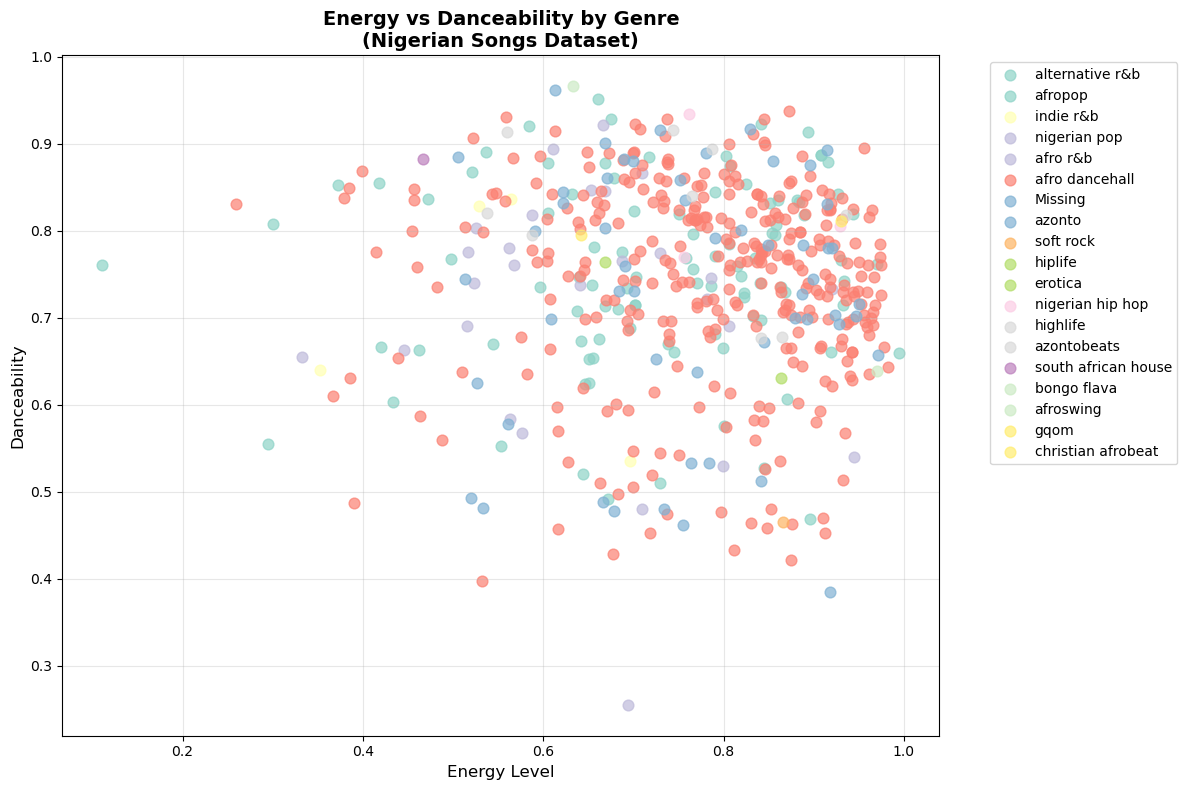

Analysis of Energy vs Danceability:
- High energy, high danceability songs likely cluster together (dance/electronic genres)
- Low energy, variable danceability might indicate ballads or acoustic songs
- This plot helps identify natural groupings based on musical feel and movement


In [4]:
# Scatterplot 1: Energy vs Danceability
plt.figure(figsize=(12, 8))

# Create scatterplot with genre colors
genres = df_clean['artist_top_genre'].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(genres)))

for i, genre in enumerate(genres):
    genre_data = df_clean[df_clean['artist_top_genre'] == genre]
    plt.scatter(genre_data['energy'], genre_data['danceability'], 
               alpha=0.7, label=genre, s=60, color=colors[i])

plt.xlabel('Energy Level', fontsize=12)
plt.ylabel('Danceability', fontsize=12)
plt.title('Energy vs Danceability by Genre\n(Nigerian Songs Dataset)', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analysis
print("Analysis of Energy vs Danceability:")
print("- High energy, high danceability songs likely cluster together (dance/electronic genres)")
print("- Low energy, variable danceability might indicate ballads or acoustic songs")
print("- This plot helps identify natural groupings based on musical feel and movement")

## Scatterplot 2: Acousticness vs Loudness with Popularity Size

This scatterplot examines the relationship between acoustic properties and loudness levels, with point sizes representing song popularity. This visualization helps identify clusters of acoustic vs electric/produced music styles.

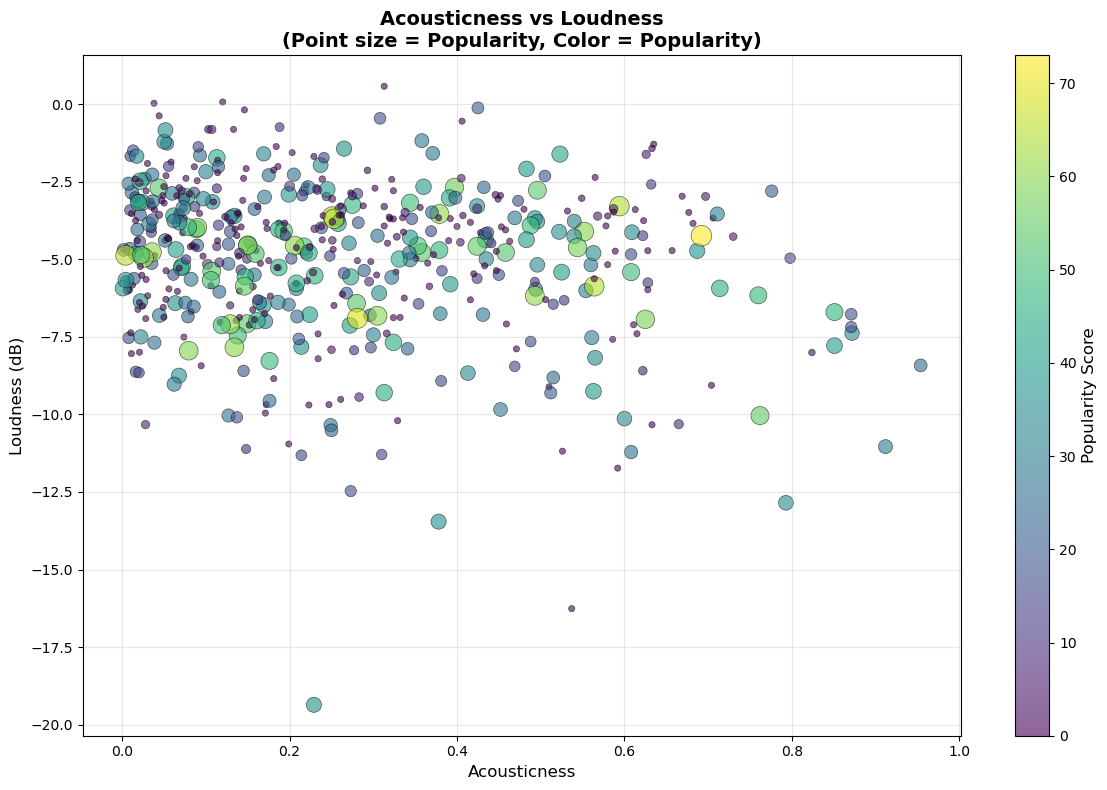

Analysis of Acousticness vs Loudness:
- High acousticness, low loudness: Acoustic/folk songs cluster
- Low acousticness, high loudness: Electronic/produced music cluster
- Popularity patterns may reveal which acoustic styles are more successful
- Clear separation between acoustic and electronic music production styles


In [5]:
# Scatterplot 2: Acousticness vs Loudness with Popularity
plt.figure(figsize=(12, 8))

# Normalize popularity for size scaling
pop_normalized = (df_clean['popularity'] - df_clean['popularity'].min()) / \
                (df_clean['popularity'].max() - df_clean['popularity'].min())
sizes = 20 + pop_normalized * 200  # Scale between 20 and 220

scatter = plt.scatter(df_clean['acousticness'], df_clean['loudness'], 
                     s=sizes, alpha=0.6, c=df_clean['popularity'], 
                     cmap='viridis', edgecolors='black', linewidth=0.5)

plt.xlabel('Acousticness', fontsize=12)
plt.ylabel('Loudness (dB)', fontsize=12)
plt.title('Acousticness vs Loudness\n(Point size = Popularity, Color = Popularity)', 
          fontsize=14, fontweight='bold')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Popularity Score', fontsize=12)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analysis
print("Analysis of Acousticness vs Loudness:")
print("- High acousticness, low loudness: Acoustic/folk songs cluster")
print("- Low acousticness, high loudness: Electronic/produced music cluster")
print("- Popularity patterns may reveal which acoustic styles are more successful")
print("- Clear separation between acoustic and electronic music production styles")

## Scatterplot 3: Tempo vs Speechiness by Length

This visualization explores the relationship between song tempo (BPM) and speechiness (how much spoken words vs singing), with colors representing song length. This helps identify clusters of rap/spoken word vs melodic music styles.

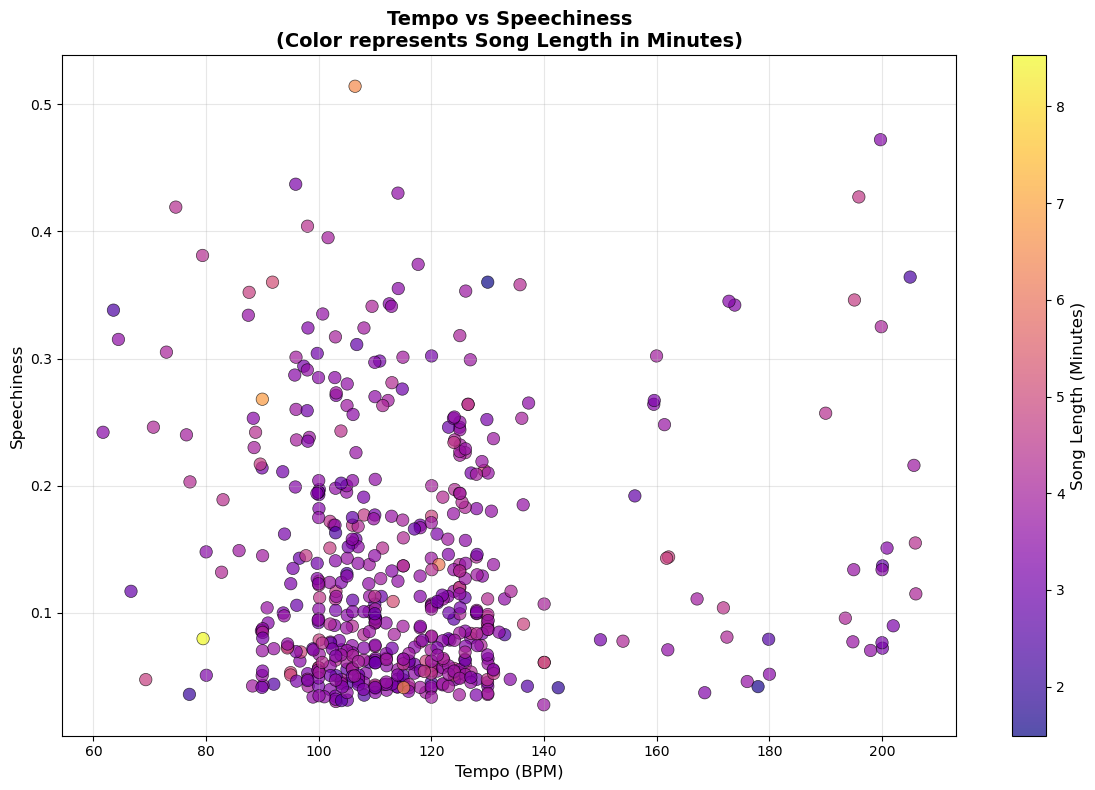

Analysis of Tempo vs Speechiness:
- High speechiness songs may cluster as rap/hip-hop regardless of tempo
- Low speechiness, variable tempo: melodic songs across different genres
- Song length patterns may correlate with certain tempo/speechiness combinations
- Fast tempo + high speechiness could indicate energetic rap songs
- Slow tempo + low speechiness might indicate ballads or slow melodic songs


In [7]:
# Scatterplot 3: Tempo vs Speechiness colored by Length
plt.figure(figsize=(12, 8))

# Convert length to minutes for better readability
df_clean['length_minutes'] = df_clean['length'] / 60000

scatter = plt.scatter(df_clean['tempo'], df_clean['speechiness'], 
                     c=df_clean['length_minutes'], alpha=0.7, s=80,
                     cmap='plasma', edgecolors='black', linewidth=0.5)

plt.xlabel('Tempo (BPM)', fontsize=12)
plt.ylabel('Speechiness', fontsize=12)
plt.title('Tempo vs Speechiness\n(Color represents Song Length in Minutes)', 
          fontsize=14, fontweight='bold')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Song Length (Minutes)', fontsize=12)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analysis
print("Analysis of Tempo vs Speechiness:")
print("- High speechiness songs may cluster as rap/hip-hop regardless of tempo")
print("- Low speechiness, variable tempo: melodic songs across different genres")
print("- Song length patterns may correlate with certain tempo/speechiness combinations")
print("- Fast tempo + high speechiness could indicate energetic rap songs")
print("- Slow tempo + low speechiness might indicate ballads or slow melodic songs")

## Scatterplot 4: Instrumentalness vs Liveness with Energy Intensity

This scatterplot examines instrumental content versus live recording characteristics, with color intensity representing energy levels. This helps distinguish between studio recordings, live performances, and instrumental pieces.

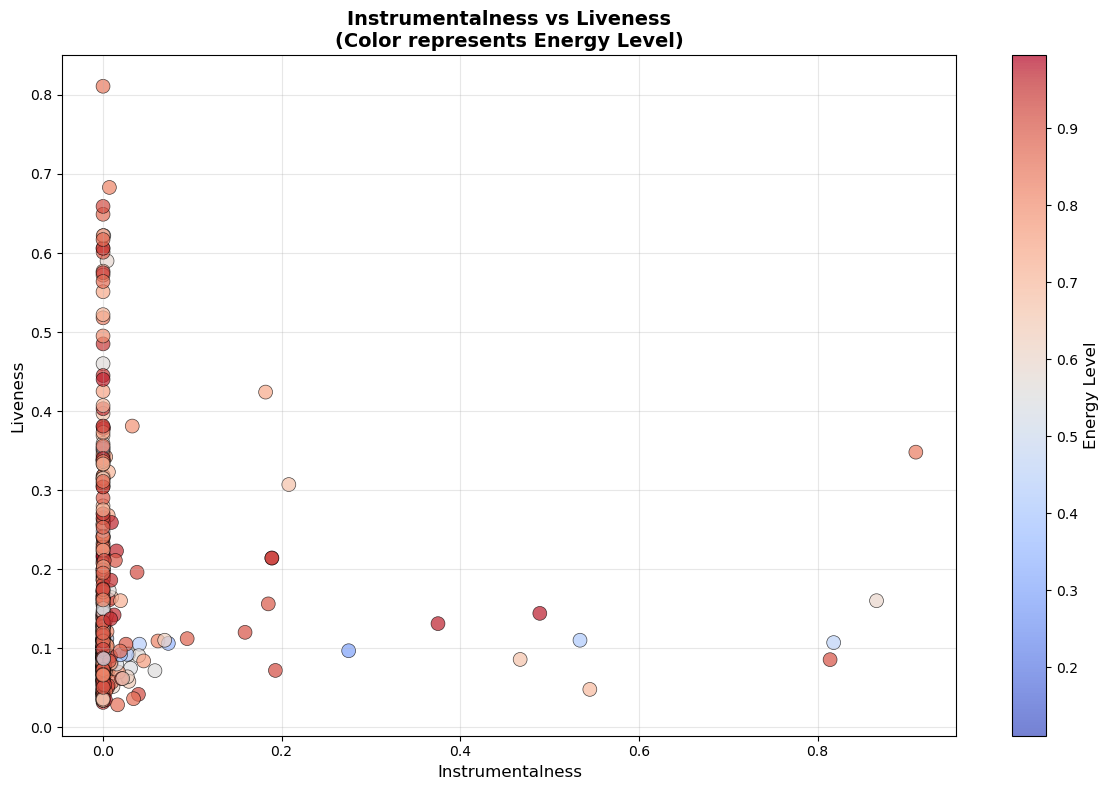

Analysis of Instrumentalness vs Liveness:
- High instrumentalness, low liveness: Studio instrumental tracks cluster
- Low instrumentalness, high liveness: Live vocal performances cluster
- Low instrumentalness, low liveness: Studio recordings with vocals cluster
- Energy levels add another dimension showing performance intensity
- This combination helps separate studio vs live, vocal vs instrumental content


In [6]:
# Scatterplot 4: Instrumentalness vs Liveness colored by Energy
plt.figure(figsize=(12, 8))

scatter = plt.scatter(df_clean['instrumentalness'], df_clean['liveness'], 
                     c=df_clean['energy'], alpha=0.7, s=100,
                     cmap='coolwarm', edgecolors='black', linewidth=0.5)

plt.xlabel('Instrumentalness', fontsize=12)
plt.ylabel('Liveness', fontsize=12)
plt.title('Instrumentalness vs Liveness\n(Color represents Energy Level)', 
          fontsize=14, fontweight='bold')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Energy Level', fontsize=12)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analysis
print("Analysis of Instrumentalness vs Liveness:")
print("- High instrumentalness, low liveness: Studio instrumental tracks cluster")
print("- Low instrumentalness, high liveness: Live vocal performances cluster")
print("- Low instrumentalness, low liveness: Studio recordings with vocals cluster")
print("- Energy levels add another dimension showing performance intensity")
print("- This combination helps separate studio vs live, vocal vs instrumental content")